In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title="Image", image=None, size=10):
    w,h=image.shape[0], image.shape[1]
    aspect_r=w/h
    plt.figure(figsize=(size*aspect_r,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


In [5]:
!pip install -U --no-cache-dir gdown --pre

In [6]:
!pip install --upgrade --no-cache-dir gdown

!pip install -U --no-cache-dir gdown --pre

!gdown "1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t"

!gdown  "1_X-V1Lp6qMAl_-9opsseieprD3Lhdq8U&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t
To: c:\Users\jackie\PycharmProjects\Projects Gihtub\course_rajeed\images.zip

  0%|          | 0.00/29.6M [00:00<?, ?B/s]
  2%|▏         | 524k/29.6M [00:00<00:27, 1.06MB/s]
  4%|▎         | 1.05M/29.6M [00:00<00:15, 1.83MB/s]
  5%|▌         | 1.57M/29.6M [00:00<00:12, 2.21MB/s]
  9%|▉         | 2.62M/29.6M [00:01<00:08, 3.16MB/s]
 11%|█         | 3.15M/29.6M [00:01<00:08, 3.30MB/s]
 12%|█▏        | 3.67M/29.6M [00:01<00:07, 3.36MB/s]
 14%|█▍        | 4.19M/29.6M [00:01<00:07, 3.49MB/s]
 16%|█▌        | 4.72M/29.6M [00:01<00:06, 3.64MB/s]
 18%|█▊        | 5.24M/29.6M [00:01<00:06, 3.68MB/s]
 19%|█▉        | 5.77M/29.6M [00:01<00:07, 3.34MB/s]
 23%|██▎       | 6.82M/29.6M [00:02<00:05, 3.80MB/s]
 25%|██▍       | 7.34M/29.6M [00:02<00:05, 3.78MB/s]
 27%|██▋       | 7.86M/29.6M [00:02<00:05, 3.85MB/s]
 28%|██▊       | 8.39M/29.6M [00:02<00:05, 3.79MB/s]
 30%|███       | 8.91M/29.6M [00:02<00:05

In [12]:
face_classifier=cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

image=cv2.imread('remi.png')
gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
faces=face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
if faces is ():
    print('No faces found')

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\jackie\AppData\Local\Temp\ipykernel_6060\4238830890.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


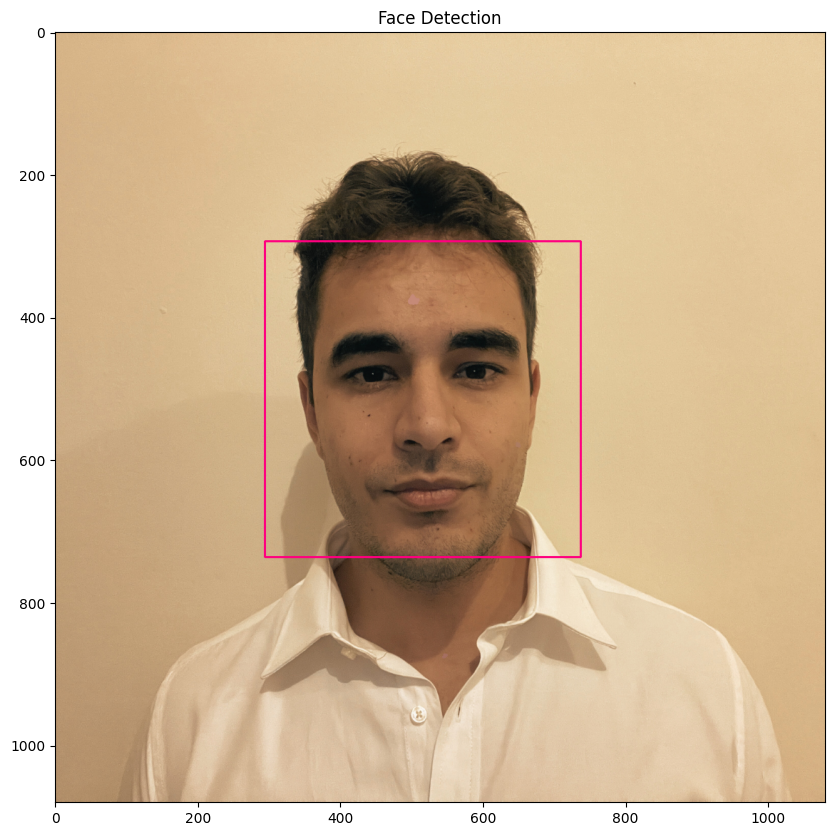

In [14]:
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

imshow('Face Detection', image)

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\jackie\AppData\Local\Temp\ipykernel_6060\4097904019.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


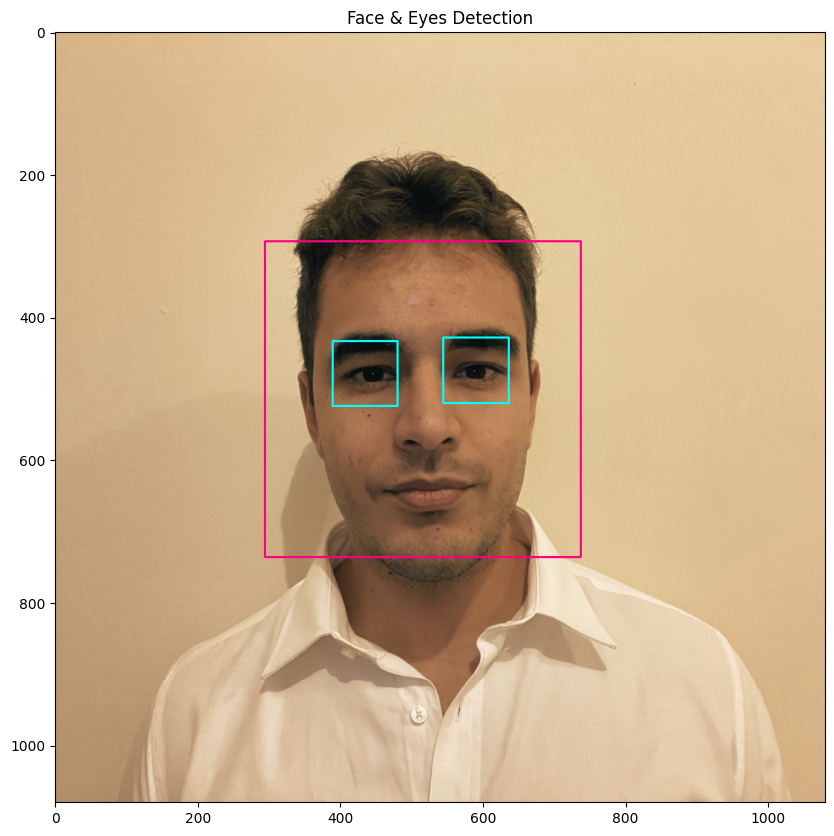

In [10]:
eye_classifier=cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
img_new=cv2.imread('remi.png')
gray=cv2.cvtColor(img_new,cv2.COLOR_BGR2GRAY)

faces=face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
if faces is ():
    print('No faces found')

for (x,y,w,h) in faces : 
    cv2.rectangle(img_new,(x,y), (x+w,y+h), (127,0,255), 2)
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=img_new[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes : 
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255,255,0), 2)
imshow('Face & Eyes Detection',img_new)

# Use this code to detect live face and eyes using the webcam from your computer


In [11]:
#using webcam for face and eyes detection
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:  # No faces detected
        return img

    for (x, y, w, h) in faces:
        # Adjust bounding box with boundary checks
        x = max(x - 50, 0)
        y = max(y - 50, 0)
        w = min(w + 50, img.shape[1] - x)
        h = min(h + 50, img.shape[0] - y)
        
        # Draw rectangle around face
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect eyes within the face region
        eyes = eye_classifier.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)

    # Return the processed image
    return img

# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:  # Handle camera read failure
        print("Failed to grab frame")
        break

    # Display the processed frame
    processed_frame = face_detector(frame)
    cv2.imshow('Our Face Extractor', processed_frame)

    # Break loop on Enter key
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()
